# Making into dataset


* Need to take the 256 3 256 data array into a flattern array
* Make dataset into numpy array

In [1]:
#importing the useful libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
from scipy.stats import skew, kurtosis

C:\Users\jana\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Obtaining Dataset
the images will be in key 0 catagories in key 1 
* data[0] will return all the images 
* data[1] will return all the catagories

In [2]:
# This is just making a labled dataset
data = tf.keras.utils.image_dataset_from_directory("dataset",batch_size=672) 
# creates a labled dataset can change the batch size for speed and image size can be set using image_size=(100,100) 
# The batch size is just all the data so will have to make much bigger with more data as currently only have 672 items

# Iterate over the dataset to convert images to grayscale
grayscale_images = []
labels = []
for images, labels_batch in data:
    for image in images:
        
        image_np = image.numpy()
        
        # Convert each image to grayscale
        grayscale_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        grayscale_images.append(grayscale_image)
    
    labels.extend(labels_batch)
    
x_in = np.array(grayscale_images)
x_normalised = x_in/255
y_in = np.array(labels)

Found 672 files belonging to 4 classes.


# Splitting Dataset

Steps 

In [3]:
X_train, X_TestAndValid, Y_train, Y_TestAndValid = train_test_split(x_normalised, y_in, test_size=0.15) # splits the whole data into 1/3 for X_train
X_val, X_test, Y_val, Y_test = train_test_split(X_TestAndValid, Y_TestAndValid, test_size=0.15) # split the train and val into 1/3 each

## Generating data sets

In [4]:
X_train = tf.keras.layers.Reshape(((256, 256, 1)))(X_train)
X_val = tf.keras.layers.Reshape(((256, 256, 1)))(X_val)
X_test = tf.keras.layers.Reshape(((256, 256, 1)))(X_test)

In [5]:
# print(x_in.shape)

# Splitting the data into data, testing and validation

old code

"""
len(data) # the number of batches
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1 # had to add them all up to total batch size a better way to do this def exists
print(train_size,test_size,val_size)"""

#test  = tf.keras.layers.Flatten()(np.array(batch[0]))

""""
train = data.take(train_size) # splitting up the data between the 3 secitons
val = data.skip(train_size).take(val_size)
testData = data.skip(test_size).skip(val_size).take(test_size+1)
""" 

# Begining the buidling the model 
* Sequential model type
* with lots of different types of layers
* Size of the input shape is up to you see np.shape(X_train[0]) to see size

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout

In [7]:
from tensorflow.keras.layers import Concatenate, Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

# Define the input shape for the images
image_input = Input(shape=(256, 256, 1))  # Assuming 256x256 grayscale images

# CNN layers
conv1 = Conv2D(16, (3, 3), 1, activation='relu')(image_input)
pool1 = MaxPooling2D()(conv1)
conv2 = Conv2D(32, (3, 3), 1, activation='relu')(pool1)
pool2 = MaxPooling2D()(conv2)
conv3 = Conv2D(16, (3, 3), 1, activation='relu')(pool2)
pool3 = MaxPooling2D()(conv3)
flatten = Flatten()(pool3)

# Additional fully connected layers for further processing
dense1 = Dense(256, activation='relu')(flatten)
dense2 = Dense(128, activation='relu')(dense1)

# Output layer
output_layer = Dense(4, activation='softmax')(dense2)

# Define the model with both CNN and handcrafted feature inputs
model = Model(inputs=[image_input], outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary() #showing structure of model

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729,492 (14.23 MB)

 Trainable params: 3,729,492 (14.23 MB)

 Non-trainable params: 0 (0.00 B)

# Training the data

In [8]:
logsdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir) # estabilishing a log directory

# Fitting the data (training)

In [9]:
hist = model.fit(X_train, Y_train, epochs = 20, validation_data=[X_val, Y_val])

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.3699 - loss: 1.3333 - val_accuracy: 0.6824 - val_loss: 0.7526
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.8138 - loss: 0.5065 - val_accuracy: 0.9765 - val_loss: 0.1089
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.9845 - loss: 0.0834 - val_accuracy: 1.0000 - val_loss: 0.0192
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.9972 - loss: 0.0150 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 3.7882e-04
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 1.0000 - loss: 4.5174e-04 - val_accuracy: 1.0000 - val_loss: 4.8508e-04
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 1.0000 - loss: 3.1721e-04 - val_accuracy: 1.0000 - val_loss: 1.7162e-04
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 1.0000 - loss: 9.755

# plotting the preformance

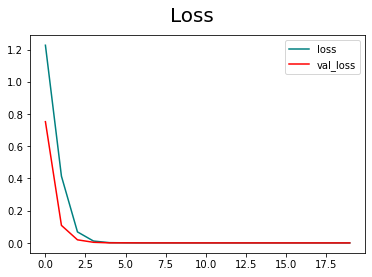

In [10]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')

fig.suptitle("Loss", fontsize = 20)
plt.legend()
plt.show()

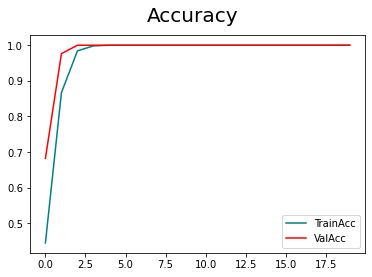

In [11]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'TrainAcc')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'ValAcc')

fig.suptitle("Accuracy", fontsize = 20)
plt.legend()
plt.show()

# Evaluation
Want to see how well this works on testing data

old code 
from tensorflow.keras.metrics import Precision, Recall ,  SparseCategoricalCrossentropy
#pre = Precision()
#re = Recall()
acc = SparseCategoricalCrossentropy()#SparseCategoricalCrossentropy() # might have to change this when we have more than 2 cats

In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 3.5389e-06


In [13]:
#print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


print("Loss: " + str(loss))
print("Accuracy: "+ str(accuracy))

Loss: 3.5389473396207904e-06
Accuracy: 1.0


In [15]:
# This is just making a labled dataset
data = tf.keras.utils.image_dataset_from_directory("JanasData",batch_size=3) 

# Iterate over the dataset to convert images to grayscale
grayscale_images = []
labels = []
for images, labels_batch in data:
    for image in images:
        
        image_np = image.numpy()
        
        # Convert each image to grayscale
        grayscale_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        grayscale_images.append(grayscale_image)
    
    labels.extend(labels_batch)
    
x_predict = np.array(grayscale_images)
y_predict = np.array(labels)

print(x_predict[0].shape)

x_predict = tf.keras.layers.Reshape(((256, 256, 1)))(x_predict)

prediction = model.predict(x_predict)

Found 1 files belonging to 1 classes.
(256, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [16]:
print(prediction)

[[0. 0. 0. 1.]]
